Missing Values:
 Student_ID        0
Math_Score       10
English_Score    12
Attendance        0
Study_Hours       0
dtype: int64


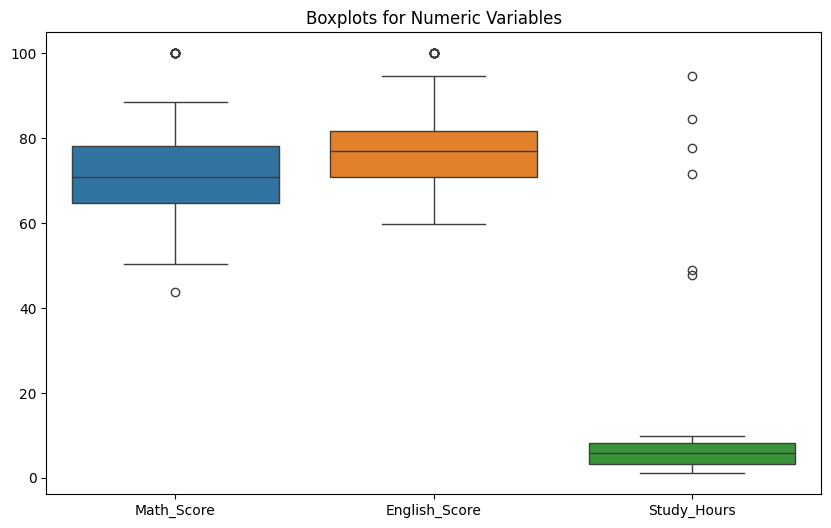

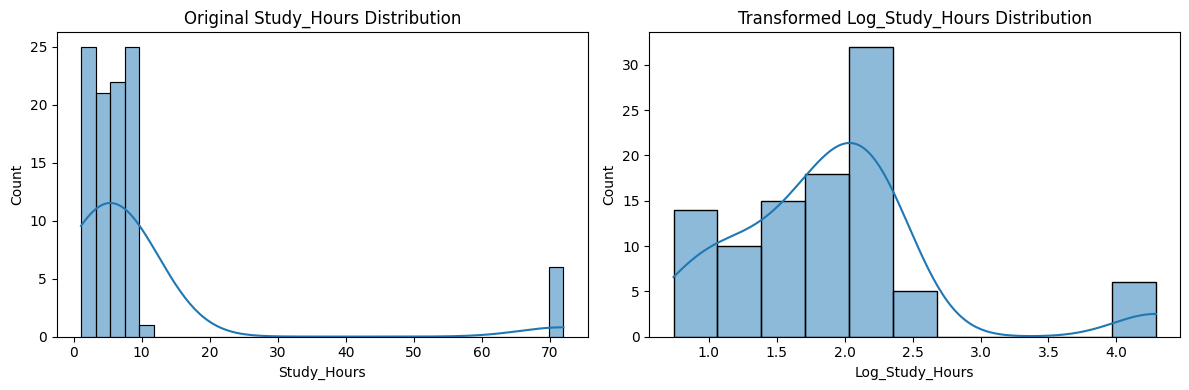

Enter Student_ID to update:  12
Enter new Attendance value (0 or 1):  0
Enter new Study_Hours value:  42


Updated DataFrame:
    Student_ID  Math_Score  English_Score  Attendance  Study_Hours  \
0            1   74.967142      63.677034           1     8.523821   
1            2   68.617357      71.634837           1     7.263768   
2            3   76.476885      72.258284           0     4.680576   
3            4   85.230299      68.581782           1     2.559649   
4            5   67.658466      73.709714           0     2.407933   
..         ...         ...            ...         ...          ...   
95          96   55.364851      62.000000           1     1.821580   
96          97   72.961203      67.929141           0     3.873823   
97          98   72.610553      76.229801           1     9.550558   
98          99   70.051135      75.465670           0     9.555464   
99         100   75.000000      65.856238           1     6.160941   

    Log_Study_Hours  
0          2.253796  
1          2.111881  
2          1.737053  
3          1.269662  
4          1.226106  
..      

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset
np.random.seed(42)
data = {
    'Student_ID': range(1, 101),
    'Math_Score': np.random.normal(70, 10, 100),
    'English_Score': np.random.normal(75, 8, 100),
    'Attendance': np.random.choice([0, 1], size=100),
    'Study_Hours': np.random.uniform(1, 10, 100),
}

df = pd.DataFrame(data)

# Introduce missing values and outliers for demonstration purposes
df.loc[df['Student_ID'] % 10 == 0, 'Math_Score'] = np.nan
df.loc[df['Student_ID'] % 8 == 0, 'English_Score'] = np.nan
df.loc[df['Student_ID'] % 15 == 0, 'Study_Hours'] = df['Study_Hours'] * 10  # Introduce outliers

# 1. Handling missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Use mean imputation for numeric variables with missing values
# Insert a value for mean imputation
df['Math_Score'].fillna(100, inplace=True) #<INSERT_VALUE_HERE>
df['English_Score'].fillna(100, inplace=True) #<INSERT_VALUE_HERE>

# 2. Handling outliers in numeric variables
# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Math_Score', 'English_Score', 'Study_Hours']])
plt.title('Boxplots for Numeric Variables')
plt.show()

# Handling outliers using the IQR method
def handle_outliers(column, replacement_value):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), replacement_value, df[column])

# Apply the outlier handling function to numeric variables
# Insert a value for outlier handling
handle_outliers('Math_Score', 75)#<INSERT_VALUE_HERE>
handle_outliers('English_Score', 62) #<INSERT_VALUE_HERE>
handle_outliers('Study_Hours', 72) #<INSERT_VALUE_HERE>

# 3. Data transformations
# Applying log transformation to reduce skewness in Study_Hours
df['Log_Study_Hours'] = np.log1p(df['Study_Hours'])

# Visualize the transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Study_Hours'], kde=True)
plt.title('Original Study_Hours Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Study_Hours'], kde=True)
plt.title('Transformed Log_Study_Hours Distribution')

plt.tight_layout()
plt.show()

# Update values interactively
# Insert values for updating Student_ID, Attendance, and Study_Hours
student_id_to_update = int(input("Enter Student_ID to update: "))
attendance_value = int(input("Enter new Attendance value (0 or 1): "))
study_hours_value = float(input("Enter new Study_Hours value: "))

# Update values in the dataframe
df.loc[df['Student_ID'] == student_id_to_update, 'Attendance'] = attendance_value
df.loc[df['Student_ID'] == student_id_to_update, 'Study_Hours'] = study_hours_value

# Display the updated dataframe
print("Updated DataFrame:")
print(df)